In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import KNNImputer

In [2]:
df = pd.read_csv('data/final_proj_data.csv')
df

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230,y
0,NaN,NaN,NaN,NaN,NaN,812.0,14.0,NaN,NaN,NaN,...,catzS2D,jySVZNlOJy,NaN,xG3x,Aoh3,ZI9m,ib5G6X1eUxUn6,mj86,NaN,0
1,NaN,NaN,NaN,NaN,NaN,2688.0,7.0,NaN,NaN,NaN,...,i06ocsg,LM8l689qOp,NaN,kG3k,WqMG,RAYp,55YFVY9,mj86,NaN,0
2,NaN,NaN,NaN,NaN,NaN,1015.0,14.0,NaN,NaN,NaN,...,P6pu4Vl,LM8l689qOp,NaN,kG3k,Aoh3,ZI9m,R4y5gQQWY8OodqDV,am7c,NaN,0
3,NaN,NaN,NaN,NaN,NaN,168.0,0.0,NaN,NaN,NaN,...,BNrD3Yd,LM8l689qOp,NaN,NaN,FSa2,RAYp,F2FyR07IdsN7I,NaN,NaN,0
4,NaN,NaN,NaN,NaN,NaN,14.0,0.0,NaN,NaN,NaN,...,3B1QowC,LM8l689qOp,NaN,NaN,WqMG,RAYp,F2FyR07IdsN7I,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,NaN,NaN,NaN,NaN,NaN,714.0,7.0,NaN,NaN,NaN,...,CE7uk3u,jySVZNlOJy,NaN,NaN,FSa2,RAYp,F2FyR07IdsN7I,NaN,NaN,0
9996,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,NaN,...,UpJuOS_,LM8l689qOp,NaN,NaN,TNEC,6fzt,F2FcTt7IdMT_v,NaN,NaN,0
9997,NaN,NaN,NaN,NaN,NaN,1526.0,7.0,NaN,NaN,NaN,...,Ff09Jxo,LM8l689qOp,NaN,NaN,FSa2,RAYp,F2FyR07IdsN7I,NaN,NaN,0
9998,NaN,NaN,NaN,NaN,NaN,1267.0,14.0,NaN,NaN,NaN,...,catzS2D,LM8l689qOp,NaN,kG3k,453m,ZI9m,TCU50_Yjmm6GIBZ0lL_,am7c,NaN,0


/var/folders/7x/q4zhf1wx08z6l2f4bqz5b8dc0000gn/T/ipykernel_46055/2076802147.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")


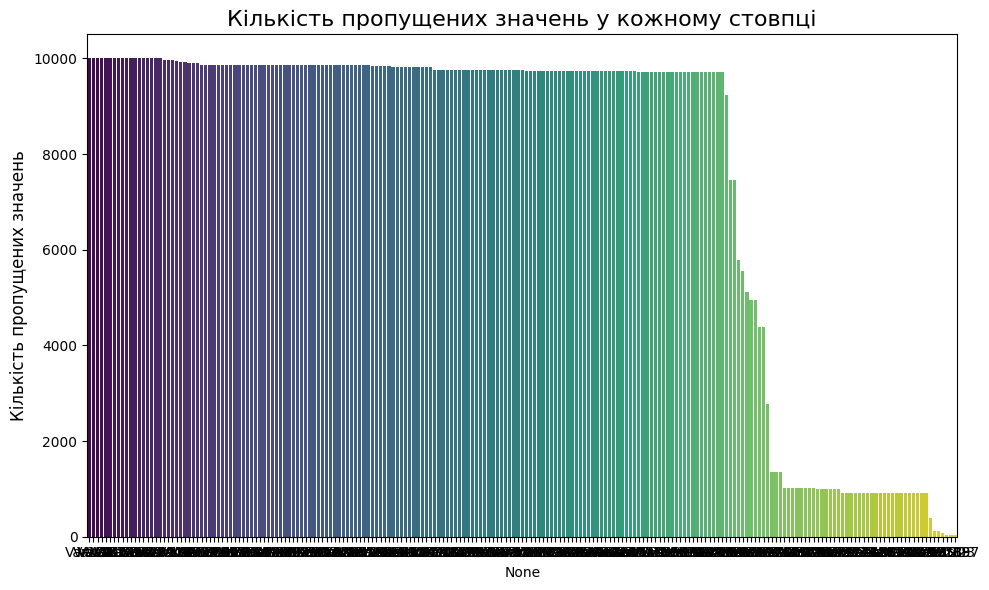

In [3]:
missing_values = df.isna().sum()
missing_values = missing_values[missing_values > 0]
missing_values = missing_values.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")
plt.title("Кількість пропущених значень у кожному стовпці", fontsize=16)
plt.ylabel("Кількість пропущених значень", fontsize=12)
plt.tight_layout()
plt.show()

In [4]:
missing_limit = len(df) * 0.5
num_cols = df.select_dtypes(include=['number']).columns

columns_for_imputation = [col for col in num_cols if df[col].isna().sum() < missing_limit and df[col].isna().sum() != 0]
columns_for_imputation[:10]

['Var6',
 'Var7',
 'Var13',
 'Var21',
 'Var22',
 'Var24',
 'Var25',
 'Var28',
 'Var35',
 'Var38']

In [5]:
imputer = KNNImputer(n_neighbors=10, weights='uniform', metric='nan_euclidean')
df[columns_for_imputation] = imputer.fit_transform(df[columns_for_imputation])

In [6]:
df[columns_for_imputation]

,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,Var38,...,Var134,Var140,Var143,Var144,Var149,Var153,Var160,Var163,Var173,Var181
0,812.0,14.0,1252.0,156.0,195.0,0.0,40.0,286.960,0.0,4850466.0,...,348816.0,410.0,0.0,27.0,0.0,10683560.0,30.0,0.0,0.0,0.0
1,2688.0,7.0,8820.0,364.0,455.0,4.0,288.0,200.000,0.0,132072.0,...,364586.0,60.0,0.0,9.0,398034.0,2230420.0,20.0,503406.0,0.0,0.0
2,1015.0,14.0,1784.0,136.0,170.0,2.0,40.0,294.480,0.0,3223524.0,...,792030.0,5720.0,0.0,27.0,554421.0,10544120.0,26.0,950436.0,0.0,0.0
3,168.0,0.0,0.0,24.0,30.0,0.0,0.0,644.240,0.0,2135430.0,...,0.0,0.0,0.0,9.0,0.0,11360440.0,4.0,0.0,0.0,0.0
4,14.0,0.0,0.0,36.0,45.0,0.0,0.0,239.840,0.0,3110400.0,...,0.0,0.0,0.0,0.0,0.0,2831652.0,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,714.0,7.0,28.0,92.0,115.0,0.0,8.0,286.960,0.0,3265326.0,...,158408.0,810.0,0.0,18.0,0.0,7246040.0,12.0,1900932.0,0.0,0.0
9996,994.0,5.6,2505.6,199.6,231.0,2.0,101.6,195.224,1.0,1867393.2,...,598999.8,1147.0,0.0,8.1,93093.0,4809799.6,32.0,482033.4,0.0,0.0
9997,1526.0,7.0,208.0,316.0,395.0,2.0,152.0,368.560,0.0,0.0,...,132966.0,270.0,0.0,0.0,35014.0,1302448.0,84.0,113184.0,0.0,7.0
9998,1267.0,14.0,3008.0,144.0,180.0,2.0,104.0,133.120,0.0,105948.0,...,125580.0,4215.0,0.0,9.0,10353.0,686980.0,8.0,470460.0,0.0,0.0
